<a href="https://colab.research.google.com/github/JuanMZ96/DataScience/blob/main/PrimeraEntregaFinal_JuanMartinez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Primera Entrega Final 06/04

##Introducción


GamerClub es una plataforma que te permite jugar al counter strike global offensive por fuera del sistema oficial que tiene el juego. Tiene su propio ranking para nivelar a los jugadores, sus modos de juegos y sus propios torneos. Es una plataforma muy completa que te permite disfrutar de otra manera del juego. 

Con todas estas premisas se genera mucha información acerca del juego y de los jugodadores. Como pueden ser las estadisticas de cada partida, como mapa, cantidad kills, muertes, hs, entre otras variales que se pueden analizar. En cuanto a los jugadores se puede ver la cantidad total de lo mismos, como saber de que país es cada uno, como también saber la cantidad de jugadores pagan la suscripción.

En esta entrega vamos a intentar buscar poder predecir el mapa pero para esto es necesario un contexto de como es la selección de los mapas en las partidas

Para llegar a esa instancia de la selección del mapa es necesario primero generar un equipo de 5 jugadores y luego ir buscando otro equipo de 5 para poder jugar la partida. Una vez llegado a este punto donde los dos equipos están ya en un menú previo a la partida donde los capitanes de los equipos van votando que mapas no quieren jugar hasta quedar solamente uno.

El listado de mapas son los mismos mapas que se juegan de manera profesional y este va cambiando según lo decida la empresa que desarrolla el juego que saca del map pool(es la manera que decide al listado) mapas viejos y agrega nuevos, así mismo también lo puede hacer la plataforma para tener una rotación mas divertida porque el map pool cambia 1 o 2 veces con suerte en el año.

Mas adelante vamos a explicar la cantidad que hay y que es lo que mas se juega.

## Obteniendo los datos relevantes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score
import time

#importo varios modelo para probar cual es el mejor
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
##

from sklearn import metrics
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


from sklearn.feature_selection import SelectKBest, chi2, SelectFdr,f_classif

#importamos los datos

In [ ]:
def leerArchivo(token,tipoArchivo=None, separador=None):
  #1UWWsv7r1ZEbwkBGbkMISFGskcDxcrPWy
  
  hash = token
  url = "https://drive.google.com/uc?export=download&id="+ hash

  if tipoArchivo == "csv":
     nombreArchivo = pd.read_csv(url, sep = separador )
  elif tipoArchivo == "xlsx":
    nombreArchivo = pd.read_excel(url, engine='openpyxl', index_col=0)
  
  
  return nombreArchivo

Dejo el link del <a href= 'https://github.com/JuanMZ96/DataScience/blob/main/DataSet/PrimerDataSet/CSGO%20Stats.xlsx'>repo</a> donde está el dataset.

In [ ]:
'''
url = 'https://raw.githubusercontent.com/JuanMZ96/DataScience/main/DataSet/PrimerDataSet/CSGO%20Stats.xlsx'

csgo= pd.read_excel(url,engine='openpyxl') 
csgo
'''
# El primer esquema es para importar los datos desde un repo de gitHub pero como implemente una función para drive, decidí usarla.

url = 'https://docs.google.com/spreadsheets/d/1QSwdFK1m-lCqC5Ror5TUPq1po0ATG2xz/edit?usp=share_link&ouid=114276064806046400891&rtpof=true&sd=true'
token = url.split('/')

csgo= leerArchivo(token[5],'xlsx')
csgo

,idPlayer,idRoom,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,qtTkAssist,...,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg,flWinner,dtCreatedAt,tb_players.descCountry,tb_players.dtBirth
idLobbyGame,,,,,,,,,,,,,,,,,,,,,
1,1,1,5,1,16,2,0,0,0.0,0.0,...,130.0,40.0,20.0,20.0,10.0,0.0,0,2022-01-21 19:45:44,cl,NaT
2,1,2,24,3,18,6,0,4,0.0,10.0,...,260.0,140.0,20.0,10.0,10.0,30.0,1,2022-02-04 02:09:47,cl,NaT
3,2,3,6,4,23,2,0,1,0.0,10.0,...,150.0,80.0,10.0,20.0,0.0,20.0,0,2021-09-18 18:07:43,br,NaT
4,2,4,8,4,26,6,0,2,0.0,0.0,...,190.0,120.0,20.0,30.0,20.0,50.0,0,2021-09-27 00:17:45,br,NaT
5,2,5,10,1,11,5,0,3,0.0,0.0,...,60.0,80.0,0.0,0.0,30.0,0.0,1,2021-09-29 22:05:47,br,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172907,2716,178496,21,3,13,5,1,1,0.0,0.0,...,420.0,260.0,10.0,40.0,60.0,20.0,1,2021-11-27 16:47:57,br,1999-12-04
172908,2716,178497,15,1,22,5,0,1,0.0,0.0,...,210.0,210.0,30.0,70.0,20.0,40.0,1,2021-12-10 01:08:48,br,1999-12-04
172909,2716,178498,9,6,23,2,0,3,0.0,0.0,...,250.0,120.0,10.0,50.0,60.0,70.0,0,2022-01-09 21:01:10,br,1999-12-04


## Preguntas

<h3> ¿Se puede predecir el mapa que se juega?

Para poder realizar esto se requiere realizar cosas previas para entender el resultado que se va a obtener

Primero empecemos poder saber la información que tenemos

<h3>¿Cuál es el listado de mapa?

Para poder ver esto vamos a generar una nueva tabla para poder identificar el listado y la cantidad jugados con un porcentaje del mismo

In [ ]:
# Creando tabla de mapas
frecuencia_mapa = csgo.value_counts('descMapName')
porcentaje_mapa = csgo.value_counts('descMapName', normalize=True) * 100
tab_freq_mapa = pd.DataFrame({'frecuencia':frecuencia_mapa, 'porcentaje':porcentaje_mapa}).reset_index()
tab_freq_mapa.rename(columns={'descMapName':'mapa'}, inplace=True)
tab_freq_mapa

,mapa,frecuencia,porcentaje
0,de_mirage,58101,31.550567
1,de_inferno,42073,22.846887
2,de_dust2,23834,12.942569
3,de_vertigo,19924,10.819323
4,de_overpass,14088,7.650202
5,de_nuke,14053,7.631196
6,de_train,7846,4.260611
7,de_ancient,4233,2.298645


In [ ]:
total = csgo.value_counts('descMapName')
print(total.sum())

184152


Vamos a generar un gráfico para poder ver de manera mas clara estos datos

<Axes: xlabel='mapa', ylabel='porcentaje'>

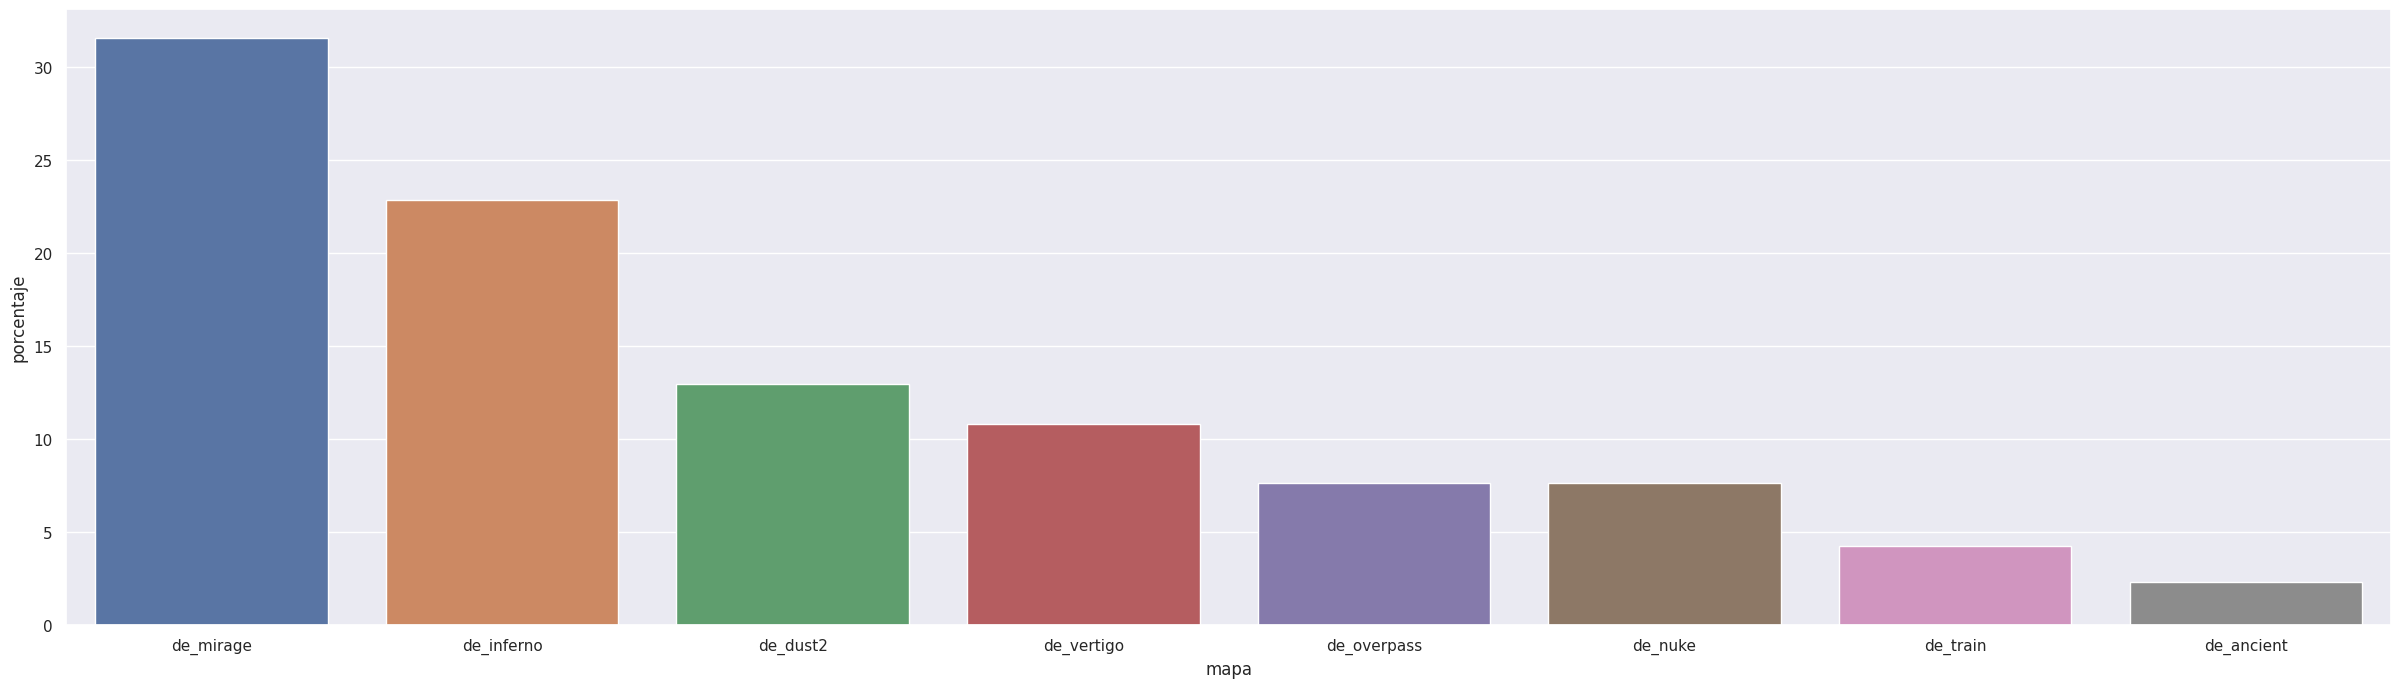

In [ ]:
sns.set(rc={'figure.figsize':(30,8)})
sns.barplot(x="mapa", y = "porcentaje", data = tab_freq_mapa)

Podemos observar de la totalidad de 184152 mapas jugadores, se ve que los mapas mas jugados son los de "Mirage" y "Inferno". Estos datos no sorprenden porque son los mapas clasico que siempre se juegan, así como que el último que tiene menos cantidad sea "Ancient" porque fue el último mapa en ser ingresado en el map pool.

<h4> Limpieza de datos

Ahora para poder empezar con los modelos es necesario realizar ciertas tareas para poder mejorar optimizar y hacer mas eficiente el proceso

Vamos a ver cuantos vacios tengo en mi DataFrame

In [ ]:
csgo_NA = csgo.isnull().sum()
csgo_NA

idPlayer                      0
idRoom                        0
qtKill                        0
qtAssist                      0
qtDeath                       0
qtHs                          0
qtBombeDefuse                 0
qtBombePlant                  0
qtTk                        120
qtTkAssist                  120
qt1Kill                       0
qt2Kill                       0
qt3Kill                       0
qt4Kill                       0
qt5Kill                       0
qtPlusKill                    0
qtFirstKill                   0
vlDamage                      0
qtHits                      120
qtShots                       0
qtLastAlive                 120
qtClutchWon                   0
qtRoundsPlayed                0
descMapName                   0
vlLevel                       0
qtSurvived                  705
qtTrade                     705
qtFlashAssist               705
qtHitHeadshot               705
qtHitChest                  705
qtHitStomach                705
qtHitLef

Comprobamos que tienen bastante y vamos a completarlas con 0, solamente para poder chequear después cuales van a ser las columnas seleccionadas para el modelo.

In [ ]:
csgo2 = csgo.fillna(0)

csgo_NA = csgo2.isnull().sum()
csgo_NA
#Ahora csgo2 no tiene vacios

idPlayer                  0
idRoom                    0
qtKill                    0
qtAssist                  0
qtDeath                   0
qtHs                      0
qtBombeDefuse             0
qtBombePlant              0
qtTk                      0
qtTkAssist                0
qt1Kill                   0
qt2Kill                   0
qt3Kill                   0
qt4Kill                   0
qt5Kill                   0
qtPlusKill                0
qtFirstKill               0
vlDamage                  0
qtHits                    0
qtShots                   0
qtLastAlive               0
qtClutchWon               0
qtRoundsPlayed            0
descMapName               0
vlLevel                   0
qtSurvived                0
qtTrade                   0
qtFlashAssist             0
qtHitHeadshot             0
qtHitChest                0
qtHitStomach              0
qtHitLeftAtm              0
qtHitRightArm             0
qtHitLeftLeg              0
qtHitRightLeg             0
flWinner            

Vamos a sacar las columnas que no nos sirven para poder seleccionar las columnas candidatas aplicando chi cuadrado

Estamos buscando las columnas que nos van ayudar a predecir las mejores condiciones para obtener la victoria en la partida. Para poder lograr eso tenemos que cambiar nuestra columna donde dice los mapas a valores númericos

In [ ]:
mapas = csgo['descMapName'].unique()
mapas

array(['de_mirage', 'de_nuke', 'de_inferno', 'de_vertigo', 'de_ancient',
       'de_dust2', 'de_train', 'de_overpass'], dtype=object)

Por lo tanto generamos una nueva tabla que contenga unicamente los nombre de los mapas y asignando de manera ordenada un "Id" para poder identificarlo

In [ ]:
mapatabla = pd.DataFrame(mapas)
mapatabla.columns = ['descMapName']
mapatabla['id_map'] = range(1,9)
mapatabla


,descMapName,id_map
0,de_mirage,1
1,de_nuke,2
2,de_inferno,3
3,de_vertigo,4
4,de_ancient,5
5,de_dust2,6
6,de_train,7
7,de_overpass,8


Está práctica se puede realizar de manera mas sencilla usando la librearias de "sklearn", los modulos de "compose" y "preprocessing", que contienen las funciones que permiten realizar estas modificaciones de manera mas rápida.

Una vez tengamos la tabla hacemos un "inner join" para unir esos id con el dataset original.

In [ ]:
csgo_union = pd.merge(csgo2, mapatabla, on='descMapName', how='inner')
result = csgo_union.dtypes
print(result)

idPlayer                           int64
idRoom                             int64
qtKill                             int64
qtAssist                           int64
qtDeath                            int64
qtHs                               int64
qtBombeDefuse                      int64
qtBombePlant                       int64
qtTk                             float64
qtTkAssist                       float64
qt1Kill                            int64
qt2Kill                            int64
qt3Kill                            int64
qt4Kill                            int64
qt5Kill                            int64
qtPlusKill                         int64
qtFirstKill                        int64
vlDamage                           int64
qtHits                           float64
qtShots                            int64
qtLastAlive                      float64
qtClutchWon                        int64
qtRoundsPlayed                     int64
descMapName                       object
vlLevel         

Y ahora vamos buscar cuales son las mejores columnas para determinar los mapas

Para ellos vamos a sacar las columnas que no nos sirven para realizar ese tipo de busqueda. Para luego usar el método  Fclassif para determinar las mejores columnas.

In [ ]:
csgo_traino =csgo_union.drop(columns = ['dtCreatedAt','tb_players.descCountry','tb_players.dtBirth','descMapName'])
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(csgo_traino)
df_escalado = pd.DataFrame(scaler_minmax.transform(csgo_traino), columns = csgo_traino.columns)

# Obtengo tdas las columnas excepto la de indexMap
train_fclassif_x = df_escalado.drop('id_map', axis=1 )
train_fclassif_y = df_escalado['id_map'].to_numpy()

#Crear selector de fclassif

fclassifSelector = SelectKBest(f_classif)
fclassifSelector.fit(train_fclassif_x, train_fclassif_y)

#Obtención de las columnas seleccionadas desde el selector ya entrenado a nuestras características
train_fclassif_x.columns[fclassifSelector.get_support(indices=True)].tolist()
columns_selected = train_fclassif_x.columns[fclassifSelector.get_support(indices=True)].tolist()
print(columns_selected)

['qtTkAssist', 'qtHits', 'qtShots', 'vlLevel', 'qtFlashAssist', 'qtHitHeadshot', 'qtHitChest', 'qtHitStomach', 'qtHitLeftAtm', 'qtHitRightArm']


/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Ya tenemos las columnas candidasta

In [ ]:
caracteristicas = csgo2[columns_selected]
c_objetivo = csgo2['descMapName']


Separamos nuestro modelo para entrenar y para predecir en un 80% y 20% 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(caracteristicas,c_objetivo,test_size=0.2, random_state=1)


In [ ]:
escalador_estandar = StandardScaler()
escalador_estandar.fit(X_train)
X_train = escalador_estandar.transform(X_train)
X_test = escalador_estandar.transform(X_test)

In [ ]:
#dejo varios modelos porque los estuve probando para ver cual era el porcentaje de eficacia en cada uno
modelo = MLPClassifier() 
#modelo = DecisionTreeClassifier() 
#modelo =KNeighborsClassifier() 
#modelo = RandomForestClassifier() 
modelo.fit(X_train, y_train)

preds = modelo.predict(X_test)

In [ ]:
preds_treino = modelo.predict(X_train)

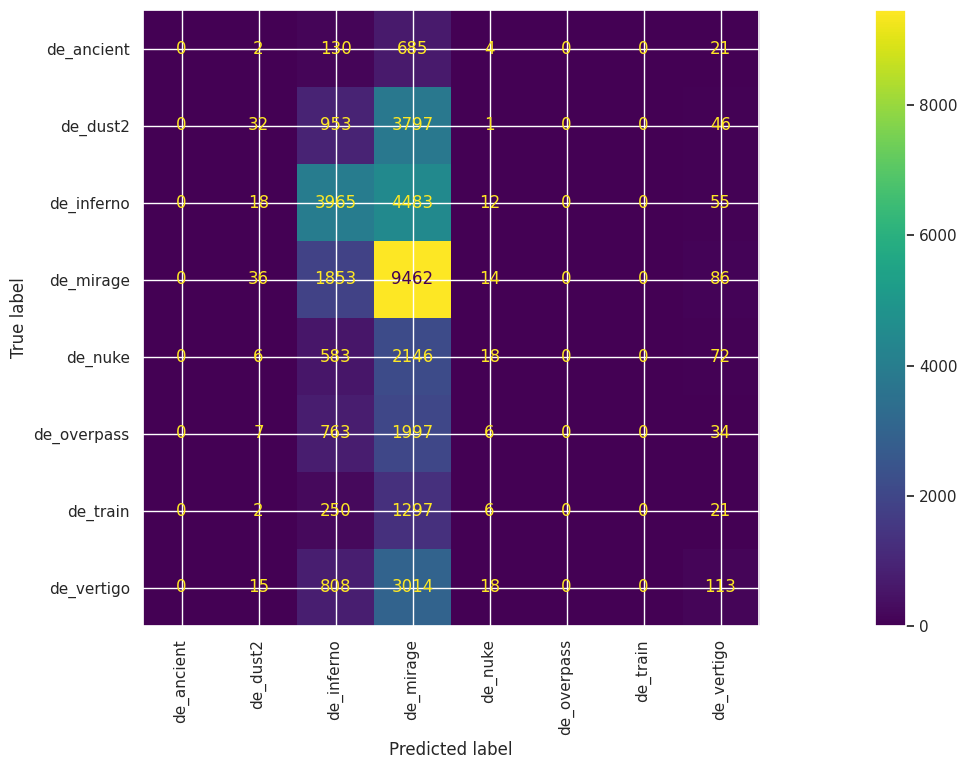

In [ ]:
ConfusionMatrixDisplay.from_estimator(modelo, X_test, y_test, xticks_rotation="vertical")

In [ ]:
#dejo varios modelos porque los estuve probando para ver cual era el porcentaje de eficacia en cada uno
#modelo2 = MLPClassifier() 
#modelo2 = DecisionTreeClassifier() 
modelo2 =KNeighborsClassifier() 
#modelo2 = RandomForestClassifier() 
modelo2.fit(X_train, y_train)

preds2 = modelo2.predict(X_test)

In [ ]:
pred2_treino = modelo2.predict(X_train)

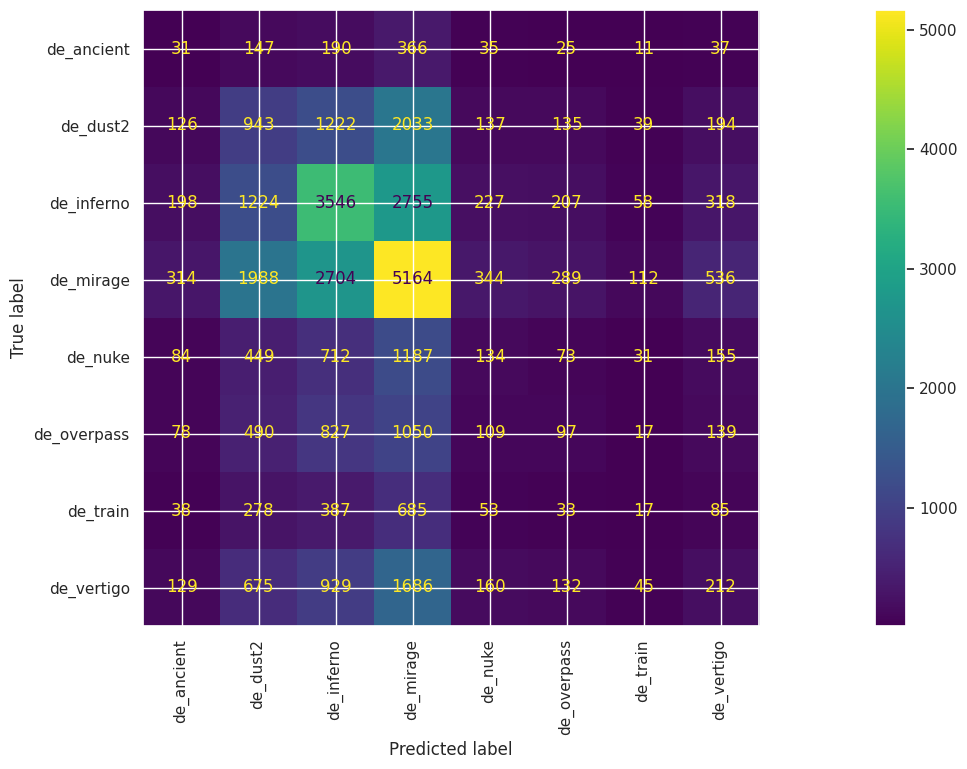

In [ ]:
ConfusionMatrixDisplay.from_estimator(modelo2, X_test, y_test, xticks_rotation="vertical")

En estos gráficos de matrises de confución podemos obervar que:

 - En la cantidad de predicciones en ambos el mapa mas facil de determinar es el mapa de "Mirage" solamente por tener mayor cantidad de mapas jugados, aquellos con poca cantidad es imposible predecir para el primer modelo.
 - Se puede ver que se confunde facilmente entre "Mirage" e "Inferno".

In [ ]:
accuracy = accuracy_score(y_test, preds)
print("Accuracy modelo1:", accuracy)
accuracy = accuracy_score(y_test, preds2)
print("Accuracy modelo2:", accuracy)

Accuracy modelo1: 0.36898265048464607
Accuracy modelo2: 0.27542016236322664


Este modelo de redes neuronales tiene una presición del 36% 
y el segundo de RamdonForest tiene una precision del 27%


<h3>Redes Neuronales</h3>

In [ ]:
print("Prect"+" "+metrics.classification_report(y_test, preds))
print("Traino"+" "+metrics.classification_report(y_train, preds_treino))

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Prect               precision    recall  f1-score   support

  de_ancient       0.00      0.00      0.00       842
    de_dust2       0.27      0.01      0.01      4829
  de_inferno       0.43      0.46      0.44      8533
   de_mirage       0.35      0.83      0.49     11451
     de_nuke       0.23      0.01      0.01      2825
 de_overpass       0.00      0.00      0.00      2807
    de_train       0.00      0.00      0.00      1576
  de_vertigo       0.25      0.03      0.05      3968

    accuracy                           0.37     36831
   macro avg       0.19      0.17      0.13     36831
weighted avg       0.29      0.37      0.26     36831



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Traino               precision    recall  f1-score   support

  de_ancient       0.50      0.00      0.00      3391
    de_dust2       0.26      0.01      0.01     19005
  de_inferno       0.43      0.48      0.45     33540
   de_mirage       0.36      0.83      0.50     46650
     de_nuke       0.26      0.01      0.02     11228
 de_overpass       1.00      0.00      0.00     11281
    de_train       0.00      0.00      0.00      6270
  de_vertigo       0.26      0.03      0.05     15956

    accuracy                           0.38    147321
   macro avg       0.38      0.17      0.13    147321
weighted avg       0.38      0.38      0.27    147321



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h3>RandomForest</h3>

In [ ]:
print("Prect"+" "+metrics.classification_report(y_test, preds2))
print("Traino"+" "+metrics.classification_report(y_train, pred2_treino))

Prect               precision    recall  f1-score   support

  de_ancient       0.03      0.04      0.03       842
    de_dust2       0.15      0.20      0.17      4829
  de_inferno       0.34      0.42      0.37      8533
   de_mirage       0.35      0.45      0.39     11451
     de_nuke       0.11      0.05      0.07      2825
 de_overpass       0.10      0.03      0.05      2807
    de_train       0.05      0.01      0.02      1576
  de_vertigo       0.13      0.05      0.08      3968

    accuracy                           0.28     36831
   macro avg       0.16      0.16      0.15     36831
weighted avg       0.24      0.28      0.25     36831

Traino               precision    recall  f1-score   support

  de_ancient       0.25      0.29      0.27      3391
    de_dust2       0.38      0.49      0.43     19005
  de_inferno       0.51      0.65      0.57     33540
   de_mirage       0.53      0.67      0.59     46650
     de_nuke       0.45      0.19      0.27     11228
 de_overpas

<h2> Conclusiones

Las conclusiones para ambos modelos implementos son muy malas, ya que ambos tienen muy baja probabilidad de poder indicar que mapa puede salir. Además ya con los resultados de entrenamiento se puede observar que no tienen tampoco buen rendmiento.

Por lo tanto, considero que los resultados obtenidos son mejores de los esperados ya que el dataset no indica nada sustancial que permita identificar la decisión a la hora de definir el mapa. Por lo tanto tener un 30% de posibilidad solamente por datos de la partida jugada es valido. Se podría mejorar probando otro tipo de modelo de predicción, como así también el modelo para definir las columnas candidatas o mejorando el proceso de transformación usando los modulos correspondientes.

Claramente podes decir que el modelo tiene underfitting ya quen no es capaz de predecir las variales pero no por culpa del modelo, si no del dataset.